# Plot Maps of ROH sharing.
Use basemap to create nice visualizations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder
import pandas as pd
from scipy.stats import binned_statistic  # For Binning

import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec

from mpl_toolkits.basemap import Basemap

import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


### Load Data
1) full meta_df and 2) HO results meta

In [29]:
### Load the relevant Data
meta_path = "./Data/Marcus2019_1240k/meta_rev_unique_ids.csv"
df_meta = pd.read_csv(meta_path)
df_ho = df_meta[df_meta["study"]=="Lazaridis et al. 2014"]

### Load HAPSBURG results
ho_results_path = "./Empirical/HO/CombinedROH/combinedroh.csv"
df_roh = pd.read_csv(ho_results_path, sep='\t')

In [32]:
df_roh[df_roh["pop"]=="Karitiana"]

,iid,pop,max_roh,sum_roh,n_roh,lat,lon,age
1,Karitiana_11,Karitiana,71.722305,617.914425,37,-10.0,-63.0,0.0
24,Karitiana_6,Karitiana,45.313498,391.608298,26,-10.0,-63.0,0.0
26,Karitiana_8,Karitiana,64.847401,385.001179,25,-10.0,-63.0,0.0
38,Karitiana_10,Karitiana,82.006193,339.903583,30,-10.0,-63.0,0.0
64,Karitiana_1,Karitiana,49.881899,271.734296,23,-10.0,-63.0,0.0
67,Karitiana_9,Karitiana,22.559301,269.280127,28,-10.0,-63.0,0.0
71,Karitiana_3,Karitiana,28.113000,260.162700,21,-10.0,-63.0,0.0
86,Karitiana_4,Karitiana,28.001595,238.774982,21,-10.0,-63.0,0.0
90,Karitiana_7,Karitiana,29.875001,233.929186,22,-10.0,-63.0,0.0
146,Karitiana_0,Karitiana,21.097201,159.277600,19,-10.0,-63.0,0.0


## World Wide Plot of all HO samples

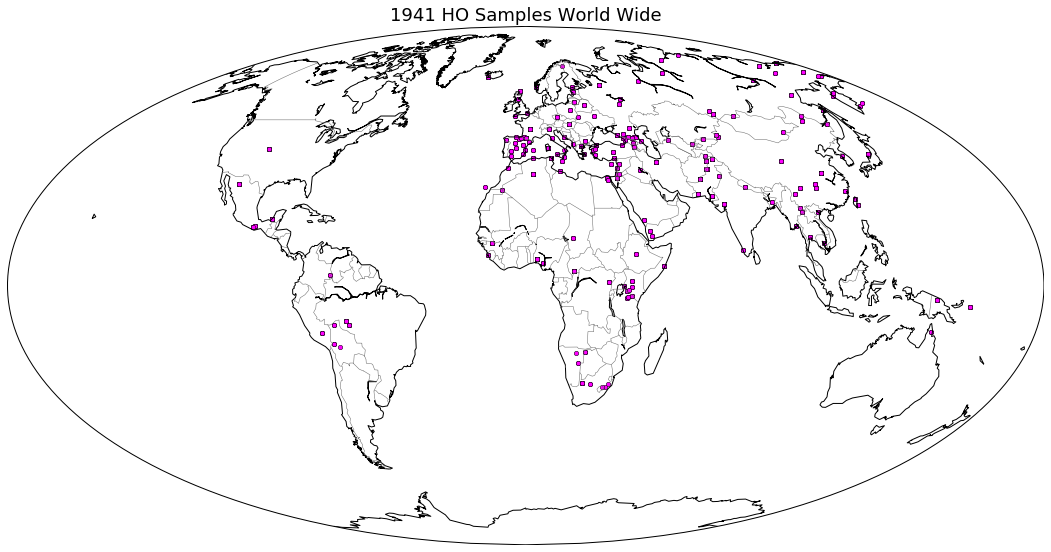

In [25]:
fs = 18
lat=df_roh["lat"].values
lon=df_roh["lon"].values

fig = plt.figure(figsize=(18,12))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

#m = Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=85, 
#                llcrnrlon=-180,urcrnrlon=180,resolution='c')

m = Basemap(projection='moll', lat_0=0, lon_0=0)

m.drawcoastlines()
#m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,1], fontsize=8)
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], rotation=45, fontsize=8)
#m.etopo(scale=0.5, alpha=0.4)  # if topological map
m.drawcoastlines(color='gray', zorder=0)
m.drawcountries(color="dimgray")
#m.drawstates()

plt.title(f"{len(lon)} HO Samples World Wide", fontsize=fs)
m.scatter(lon, lat, latlon=True, c="magenta", ec="k", s=20, lw=0.5) #cmap=cmap0, norm=norm0
#          c=df_plot["ages"].values, alpha=0.8, s=25, edgecolors='k', linewidths=0.3)

#plt.colorbar(label="Age [ky BP]", shrink=0.5)
#fig.savefig("", dpi=200, bbox_inches = 'tight', pad_inches = 0)
#plt.close(fig)

plt.show()

## Code to plot single continents
Settled on "merc" projection for that

In [19]:
def plot_continent(df, crs=[30, 60, -10, 40], s=40, vrange=[0, 400], cmap="hot_r", fs_label=14, figsize=(12,11),
                  states=True, annotate=False, fs_labels=14, ew=0.5, y_off=1):
    """Plot a continent, based on coordinates in df
    df: Pandas Datframe with lat lon column
    crs: [4], Corners of plot (lat and then lon)
    vrange: Normalization range for color [cM]
    shiftlong: Add to longitude (in cases for map on South America)"""
    col_cont, col_lake = "#d9d9d9", "#d9d9d9"  # Colors for Map
    fs = 18
    #fs_labels=14
    lon, lat = df["lon"].values, df["lat"].values
    
    
    colors = df["sum_roh"]  ### Plot based on sum roh
    cmap = cm.get_cmap(cmap)
    norm = plt.Normalize(vrange[0], vrange[1])  # Normalize to age BCE
    
    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 1, height_ratios=[12,1]) # Third axis is just to get space!
    ax = plt.subplot(gs[0]) # The upper subplot
    ax1 = plt.subplot(gs[1]) # The lower one
    
    gs.update(wspace=0.0, hspace=0.02) # set the spacing between axes.

    m = Basemap(projection='merc', llcrnrlat=crs[0], urcrnrlat=crs[1],\
                llcrnrlon=crs[2], urcrnrlon=crs[3], resolution='i', ax=ax)  # mill

    m.fillcontinents(color=col_cont, zorder=0, lake_color=col_lake)
    #m.etopo(scale=0.5, alpha=0.4)  # if topological map
    m.drawcoastlines(color='gray', zorder=0)
    m.drawcountries(color="dimgray")
    
    if states==True:
        m.drawstates()
        
    ### Convert lat/lon to the plot coordinates
    #lon = m.shiftdata(lon, lon_0=0) # Shift Longitudes so that plotted (-180,180 around lon0)
    coords = np.array([m(lon[i],lat[i]) for i in range(len(lon))])
    x,y = np.array(coords[:,0]), np.array(coords[:,1])

    ax.scatter(x, y, c=colors, ec="k", s=s, lw=ew, cmap=cmap, norm=norm)
    #m.scatter(lon, lat, latlon=True, c=colors, ec="k", s=s, lw=ew, cmap=cmap, norm=norm)
    
    if annotate==True:
        for i, txt in enumerate(df["clst"]):
            ax.text(x[i], y[i]+y_off, txt, fontsize=fs_labels, zorder=1, ha="center", clip_on=True)
        
    ### Do the Colorbar
    plot_colorbar(ax1, fs_label=fs_label, cmap=cmap, norm=norm)
    plt.show()
    
    
def plot_colorbar(ax1, fs_label, cmap, norm, tot_len=3539.39):
    """Code for plotting the colorbar"""
    cb1 = clb.ColorbarBase(ax1, cmap=cmap,
                           norm=norm, orientation='horizontal') # For the /1e3 format
    cb1.ax.tick_params(axis='x', direction='in', labelsize=fs_label)
    ax1.set_xlabel('Sum Indiviual ROH >4cM [cM]', fontsize=fs_label, rotation=0, labelpad=10)
    
    ### Set the Ticks for various degrees of Relatives:
    ticks = [tot_len/16, tot_len/64]
    labels = ["Full 1st Cousin", "Full 2nd Cousin"]
    
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    
    ax2.set_xticks(ticks)
    ax2.set_xticklabels(labels)
    ax2.tick_params(axis='x', direction='in', labelsize=fs_label, pad=-fs_label*1.5)

    
def prepare_coordinates_square(lat, lon, ofst_lat=0.1, ofst_lon=0.2):
    """Prepare and return coordinates in a square"""
    assert(len(lat)>0)   # Sanity Check
    n = len(lat)
    ints = np.array(range(n))
    r = np.ceil(np.sqrt(n)) # What's the maximum width
    hor = ints % r
    ver = np.floor(ints / r)
    
    # Apply the Correction
    lon_new = lon + hor * ofst_lon - (r-1)/2 * ofst_lon
    lat_new = lat - ver * ofst_lat + (r-1)/2 * ofst_lat
    
    return lat_new, lon_new

def prepare_coordinates_df(df, ofst_lat=0.1, ofst_lon=0.2):
    """Create coordinates in a new Dataframe, based on matching groups of coordinates"""
    gp = df.groupby(['lat','lon'])
    gp_idcs = list(gp.indices.values())  # Get list of list of Indices

    df_plot = df.copy(deep=True)  # Make a Deep Copy for modifying GPS

    ### Modify all Lat/Lon Indices
    for i, idcs in enumerate(gp_idcs[:]):  # Go over all Group Indices
        x = df.iloc[idcs][["lat", "lon"]]
        lat, lon =  df.iloc[idcs]["lat"], df.iloc[idcs]["lon"]
        lat, lon = prepare_coordinates_square(lat.values, lon.values, 
                                              ofst_lat=ofst_lat, ofst_lon=ofst_lon)

        df_plot["lat"].iloc[idcs] = lat
        df_plot["lon"].iloc[idcs] = lon
    return df_plot

### Plot Europe with splitting up samples

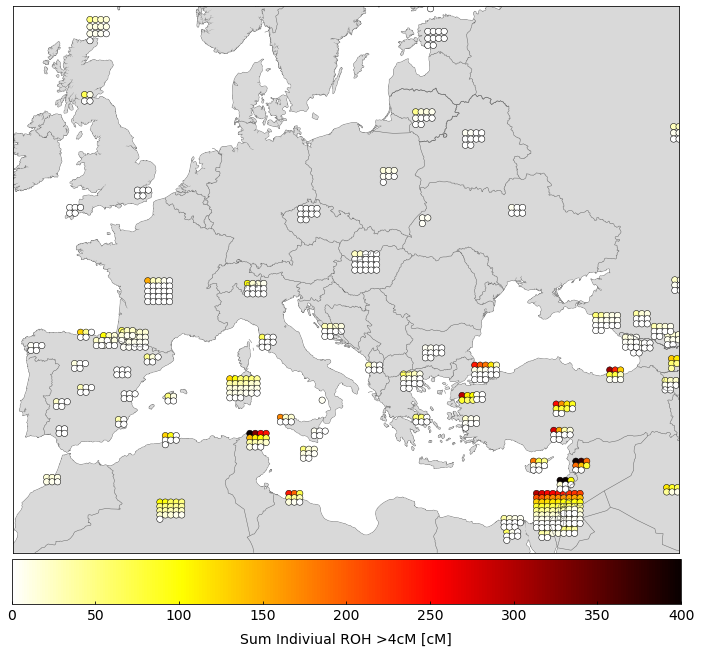

In [315]:
#df_plot = prepare_coordinates_df(df_roh, ofst_lat=0.3, ofst_lon=0.45)
plot_continent(df_plot, crs=[29, 60, -10, 45])

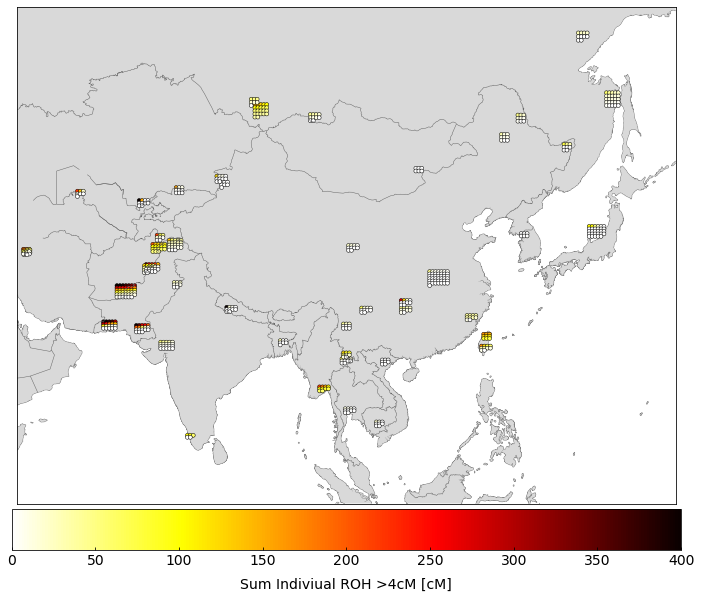

In [339]:
### Do the same for Asia
plot_continent(df_plot, crs=[0, 60, 50, 150], s=15, figsize=(12,10))

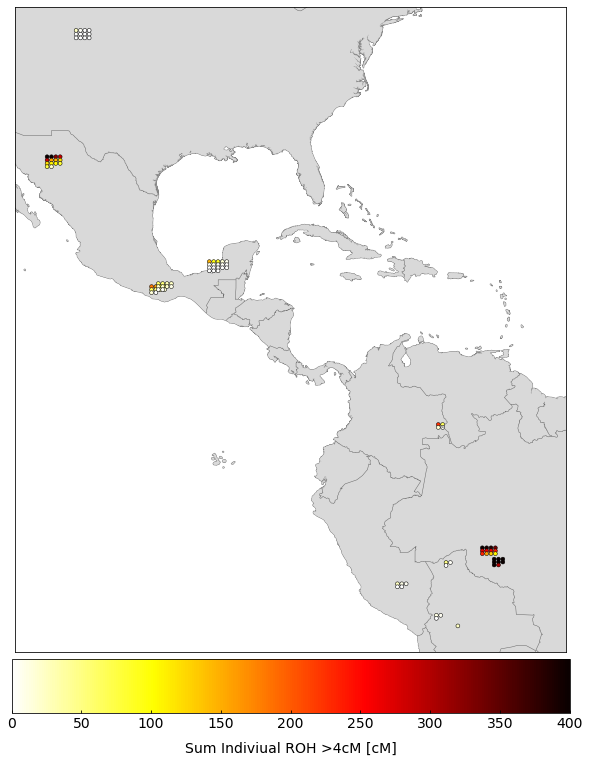

In [362]:
plot_continent(df_plot, crs=[-20, 42, 248, 305], s=15, figsize=(10,13), states=False)

# Plot ROH from Reich Sample (ancients)
Need Plotting functino and Imports from above

In [4]:
### First load the Data
df1 = pd.read_csv("./Empirical/Eigenstrat/Reichall/combined_roh.csv", '\t')
print(f"Loaded {len(df1)} Individuals")

Loaded 1098 Individuals


In [4]:
### Then apply some filters
age_cutoff=15000

df1 = df1[~np.isnan(df1["lat"])]
df1 = df1[~np.isnan(df1["lon"])]
print(f"Filtered to {len(df1)} Individuals with existing Lat/Lon values")
df1 = df1[df1["age"]<age_cutoff]
print(f"Filtered to {len(df1)} Individuals with Age < {age_cutoff}")
df_plot = prepare_coordinates_df(df1, ofst_lat=0.3, ofst_lon=0.45)

Filtered to 988 Individuals with Lat/Lon
Filtered to 966 Individuals with Age < 15000


/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


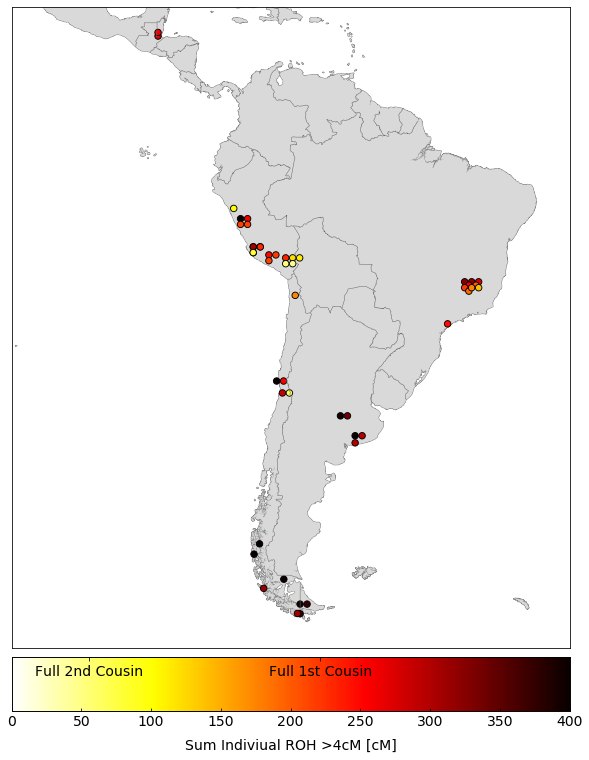

In [20]:
#df_plot = prepare_coordinates_df(df1, ofst_lat=0.8, ofst_lon=1.0)
plot_continent(df_plot, crs=[-58, 20, -110, -30], s=42, figsize=(10,13), states=False,
               annotate=False, fs_labels=8, ew=0.9, y_off=1e5)

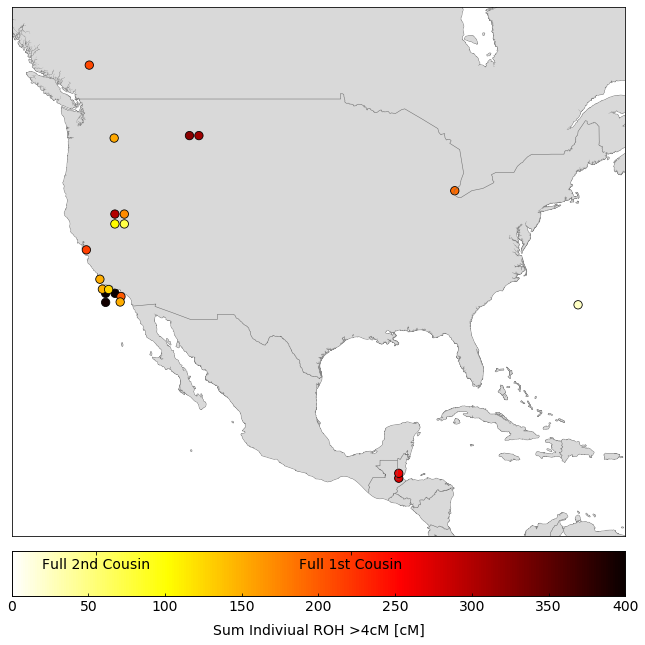

In [21]:
plot_continent(df_plot, crs=[10, 55, -130, -65], s=70, figsize=(11,11), states=False,
               annotate=False, fs_labels=8, ew=0.8)

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


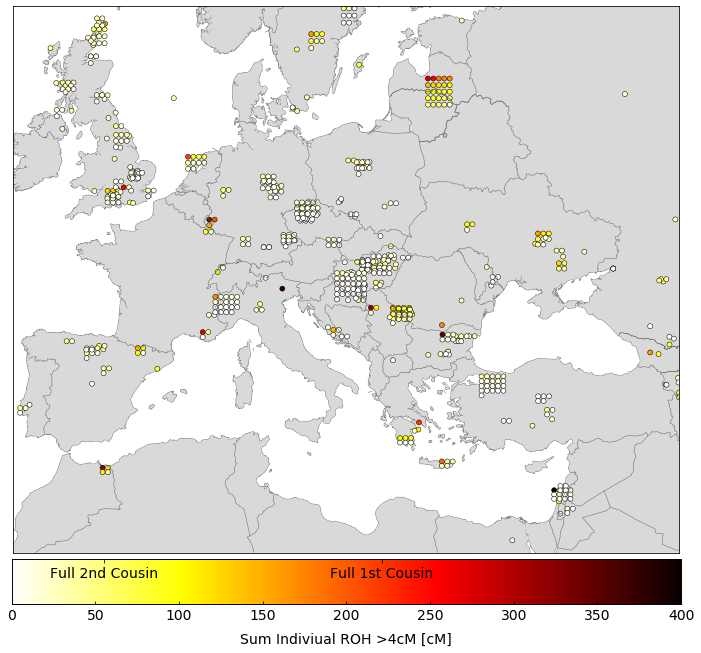

In [22]:
df_plot = prepare_coordinates_df(df1, ofst_lat=0.3, ofst_lon=0.45)
plot_continent(df_plot, crs=[29, 60, -10, 45], s=25)
#plot_continent(df_plot, crs=[30, 40, 30, 40], s=30)

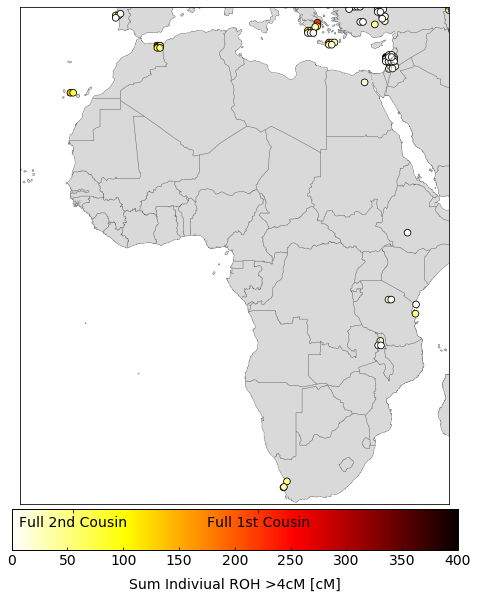

In [25]:
plot_continent(df_plot, crs=[-35, 40, -25, 45], s=45, figsize=(8,10), ew=0.8)

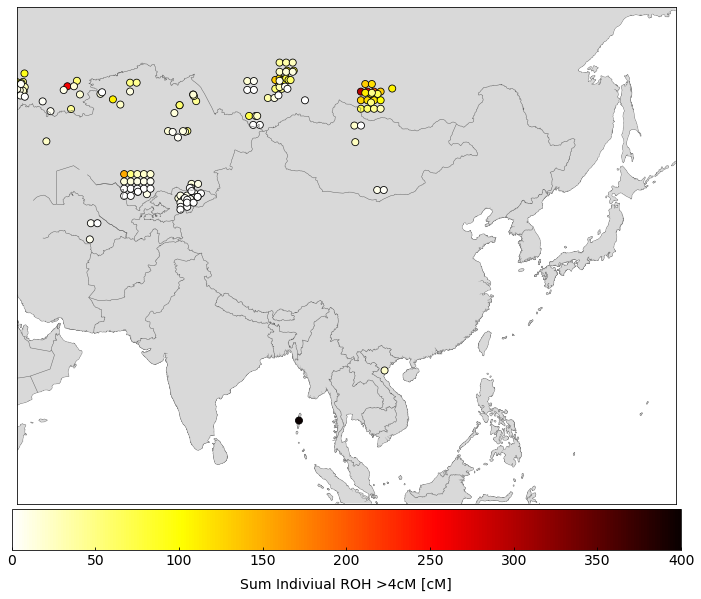

In [23]:
plot_continent(df_plot, crs=[0, 60, 50, 150], s=50, figsize=(12,10),
               annotate=False, fs_labels=14, ew=0.8)

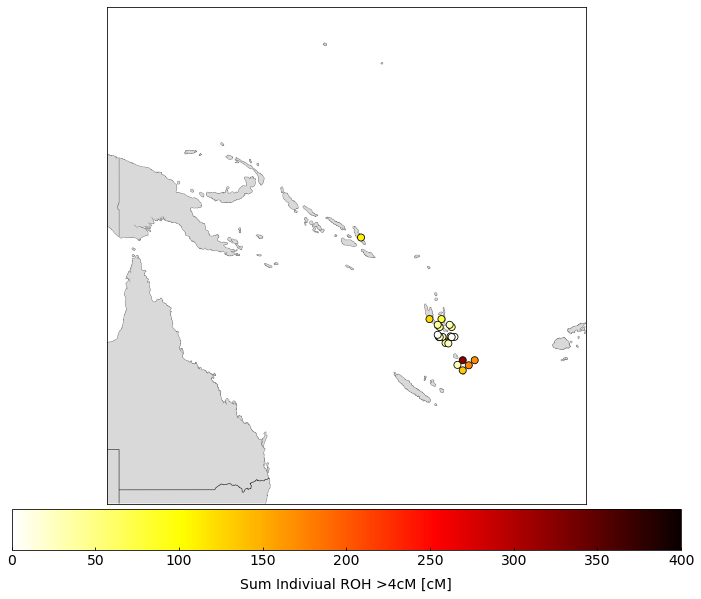

In [35]:
plot_continent(df_plot, crs=[-30, 10, 140, 180], s=50, figsize=(12,10),
               annotate=False, fs_labels=14, ew=0.8)

# Area 51
Test Code here 

In [212]:
lat = df_ho[df_ho["clst"]=="Sardinian"]["lat"]
lon = df_ho[df_ho["clst"]=="Sardinian"]["lon"]

In [19]:
#-58, 20, -110, -30
#lat_okay = (df1["lat"]>-58) & (df1["lat"]<20)
lat_okay = (df1["lat"]>-90) & (df1["lat"]<90)
lon_okay = (df1["lon"]>-150) & (df1["lon"]<-30)
df_sa = df1[lat_okay & lon_okay]
df_sa["study"].value_counts()

PosthNakatsukaCell2018      33
MorenoMayarScience2018      12
ScheibScience2018            9
LindoScienceAdvances2018     5
RaghavanScience2015          3
delaFuentePNAS2018           3
RasmussenNature2014          2
RasmussenNature2010          1
RasmussenNature2015          1
Name: study, dtype: int64

In [23]:
df_sa[df_sa["study"]=="delaFuentePNAS2018"]

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
12,IPK13a.SG,31.267608,539.690993,67,-49.139722,-74.451944,1193.0,delaFuentePNAS2018,Chile_Kaweskar_1000BP.SG,3.5,1044915,1
14,IPK12.SG,30.227202,501.053778,58,-52.350000,-70.966667,863.0,delaFuentePNAS2018,Chile_Kaweskar_1000BP.SG,7.8,1142798,1
41,IPY08b.SG,12.946699,309.061452,54,-55.250000,-69.016667,1000.0,delaFuentePNAS2018,Chile_Yamana_1000BP.SG,1.7,903809,1


In [124]:
df_sa.sort_values(by="mean_cov", ascending=False)[["iid", 'mean_cov', "study", "sum_roh", "max_roh", "lat", "lon", "clst"]]

,iid,mean_cov,study,sum_roh,max_roh,lat,lon,clst
243,Lovelock3.SG,18.128566,MorenoMayarScience2018,74.658908,11.797404,39.960000,-118.560000,USA_Nevada_LovelockCave_600BP.SG
76,AHUR_2064.SG,17.937478,MorenoMayarScience2018,217.011071,14.925504,37.410000,-122.080000,USA_Nevada_SpiritCave_11000BP.SG
34,Anzick.SG,16.538000,RasmussenNature2014,323.603399,15.401101,45.993056,-110.661389,USA_Anzick.SG
102,Lovelock2.SG,14.359982,MorenoMayarScience2018,170.682183,18.530298,39.960000,-118.560000,USA_Nevada_LovelockCave_1850BP.SG
46,Inuk.SG,14.140000,RasmussenNature2010,297.470982,14.305799,69.243800,-53.541300,Greenland_Saqqaq.SG
40,Anzick_realigned.SG,14.045536,RasmussenNature2014,311.765003,15.401101,45.993056,-110.661389,USA_Anzick_realigned.SG
92,Sumidouro5.SG,13.628461,MorenoMayarScience2018,189.736585,13.487297,-19.540000,-43.940000,Brazil_Sumidouro_10100BP.SG
17,A460.SG,10.318539,MorenoMayarScience2018,456.060958,30.377900,-50.100000,-75.240000,Chile_Ayayema_5100BP.SG
14,IPK12.SG,7.800000,delaFuentePNAS2018,501.053778,30.227202,-52.350000,-70.966667,Chile_Kaweskar_1000BP.SG
319,IL2.SG,5.665640,LindoScienceAdvances2018,49.753906,7.078302,-16.200000,-69.700000,Peru_RioUncallane_1800BP.SG


In [5]:
df1[df1["study"]=="RaghavanScience2015"]

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
24,MA577.SG,35.410404,392.416215,49,-54.875556,-68.136389,100.0,RaghavanScience2015,Argentina_Fuego_Patagonian.SG,2.078,925364,1
26,Yaghan895.SG,22.256702,376.446527,60,-54.875556,-68.136389,100.0,RaghavanScience2015,Argentina_Fuego_Patagonian.SG,1.446,658876,1
27,Yaghan894.SG,25.148904,373.892782,54,-54.875556,-68.136389,100.0,RaghavanScience2015,Argentina_Fuego_Patagonian.SG,1.137,618185,1


In [6]:
df1[df1["study"]=="delaFuentePNAS2018"]

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
12,IPK13a.SG,31.267608,539.690993,67,-49.139722,-74.451944,1193.0,delaFuentePNAS2018,Chile_Kaweskar_1000BP.SG,3.5,1044915,1
14,IPK12.SG,30.227202,501.053778,58,-52.350000,-70.966667,863.0,delaFuentePNAS2018,Chile_Kaweskar_1000BP.SG,7.8,1142798,1
41,IPY08b.SG,12.946699,309.061452,54,-55.250000,-69.016667,1000.0,delaFuentePNAS2018,Chile_Yamana_1000BP.SG,1.7,903809,1
